# Project: **Marketing Campaign EDA**
This notebook performs an exploratory data analysis (EDA) on a marketing campaign dataset to uncover insights about customer behavior, spending patterns, and campaign responses. The goal is to better understand the factors that influence campaign success and customer engagement.

### Dataset Feature Descriptions
The dataset includes a variety of features about customers and their interactions with marketing campaigns:

- **AcceptedCmp1** – 1 if the customer accepted the offer in the 1st campaign, 0 otherwise  
- **AcceptedCmp2** – 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise  
- **AcceptedCmp3** – 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise  
- **AcceptedCmp4** – 1 if the customer accepted the offer in the 4th campaign, 0 otherwise  
- **AcceptedCmp5** – 1 if the customer accepted the offer in the 5th campaign, 0 otherwise  
- **Response** *(target)* – 1 if the customer accepted the offer in the last campaign, 0 otherwise  

---

- **Complain** – 1 if the customer complained in the last 2 years  
- **DtCustomer** – Date of customer’s enrollment with the company  
- **Education** – Customer’s level of education  
- **Marital** – Customer’s marital status  
- **Kidhome** – Number of small children in the customer’s household  
- **Teenhome** – Number of teenagers in the customer’s household  
- **Income** – Customer’s yearly household income  

---

- **MntFishProducts** – Amount spent on fish products in the last 2 years  
- **MntMeatProducts** – Amount spent on meat products in the last 2 years  
- **MntFruits** – Amount spent on fruit products in the last 2 years  
- **MntSweetProducts** – Amount spent on sweet products in the last 2 years  
- **MntWines** – Amount spent on wine products in the last 2 years  
- **MntGoldProds** – Amount spent on gold pro


## Notebook Content :   
1. Data Loading and Initial Exploration   
2. Data Preprocessing   
3. Feature Engineering    
4. Exploratory Data Analysis (EDA)


Importing necessary libraries for data manipulation, visualization, and environment variable handling

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import re
import os
from dotenv import load_dotenv
from datetime import datetime

## 1. ***Data Loading and Initial Exploration***
The dataset is loaded using pandas, and basic exploration is performed to understand the structure:

In [3]:
df = pd.read_csv(r"C:\Users\user\Desktop\marketing_campaign_analysis\marketing_campaign.csv", sep=";")
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
print("the shape of data :",df.shape)

the shape of data : (2240, 29)


In [5]:
print("data columns info :")
df.info()

data columns info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases 

## 2. ***Data Preprocessing***

checking if tere are any missing data

In [6]:
print(df.isnull().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


we found that there are 24 missing values in `Income` col 

<Axes: xlabel='Income', ylabel='Count'>

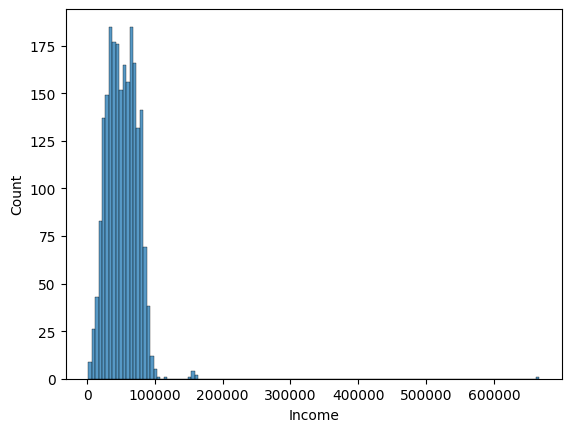

In [7]:
sns.histplot(data=df, x="Income")

The histogram and descriptive statistics confirm that the data follows a normal distribution (symmetric, bell-shaped).   
Since the distribution is normal, the mean is an appropriate measure of central tendency for imputation.

In [8]:
df["Income"].fillna(df["Income"].mean(), inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_13896\1646074324.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Income"].fillna(df["Income"].mean(), inplace=True)


checking if there are any duplicated data

In [9]:
print("number of duplicated data:",df.duplicated().sum())

number of duplicated data: 0


Outlier Detection & Treatment in Income Data
1. Initial Observation   
Visualized the distribution of the columns using a boxplot.   

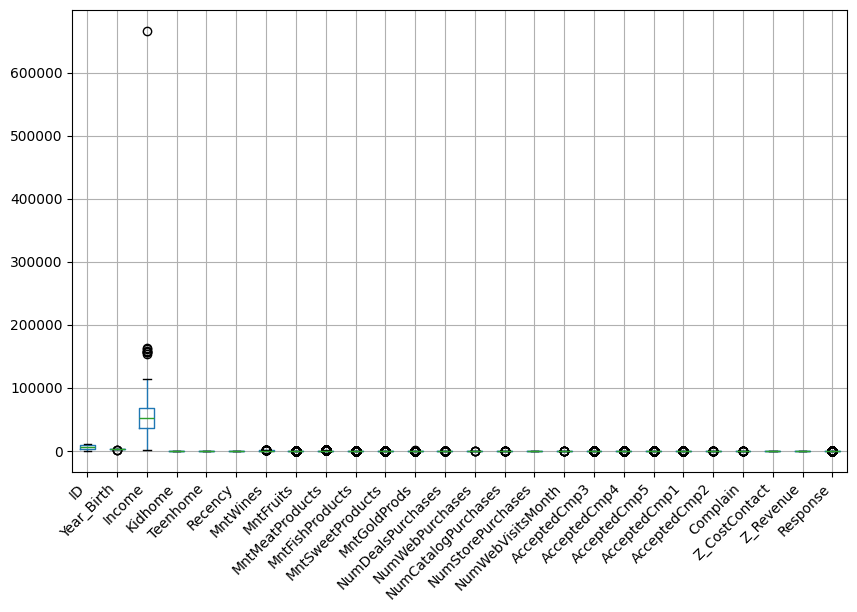

In [10]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the box plots for all columns
df.boxplot(ax=ax)

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right')  # `ha='right'` aligns labels neatl

# Show the plot
plt.show()

Identified a significant number of extreme values (outliers) distorting the income data's spread.

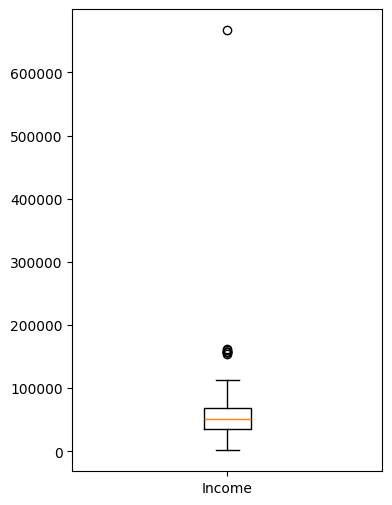

In [11]:
fig, ax = plt.subplots(figsize=(4, 6))
ax.boxplot(df['Income'])
ax.set_xticklabels(['Income'])  # Set custom x-axis label
plt.show()

By IQR method to identify and remove outliers.   

In [12]:
# Calculate the IQR for the Income column
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

# Identify the outliers in the Income column
outliers = df[(df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR))]

# Print the number of outliers
print("Number of outliers in the Income column:", len(outliers))

Number of outliers in the Income column: 8


In [13]:
# Remove outliers from the Income column using the IQR method
df = df[(df['Income'] >= (Q1 - 1.5 * IQR)) & (df['Income'] <= (Q3 + 1.5 * IQR))]

Plot the distribution of a column to visualize the outliers after Removing outliers

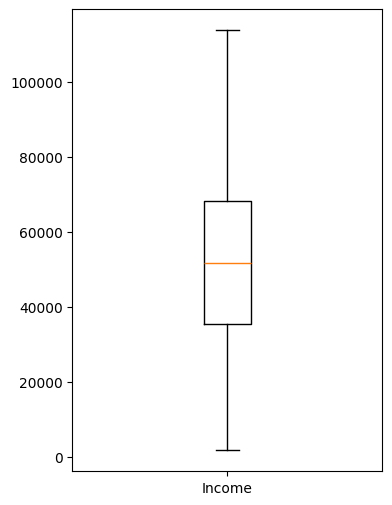

In [14]:
# Plot the distribution of a column to visualize the outliers after Removing outliers
fig, ax = plt.subplots(figsize=(4, 6))
ax.boxplot(df['Income'])
ax.set_xticklabels(['Income'])  # Set custom x-axis label
plt.show()

## 3. ***Feature Engineering***

In [15]:
print("Unique values in Education column:", df["Education"].unique())
print("Unique values in Martial Status column:", df["Marital_Status"].unique())

Unique values in Education column: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Unique values in Martial Status column: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


**Categorizing Education Levels**

We create a new column, `Education_level`, by grouping the `Education` column into three categories:  
- **High**: PhD and Master  
- **Middle**: Graduation and 2n Cycle  
- **Low**: Basic  

This helps simplify analysis by reducing the number of unique values.

In [16]:
high_education = ["PhD","Master"]
mid_education = ['Graduation','2n Cycle']
low_education = ['Basic']

def education_level(education):
    if education in high_education:
        return "high"
    elif education in mid_education:
        return "Middle"
    elif education in low_education:
        return "Low"
    else :
        return "WTF is that"
    
df["Education_level"] = df["Education"].apply(education_level)

print("Unique values in Education column:", df["Education_level"].unique())

Unique values in Education column: ['Middle' 'high' 'Low']


**Creating Living Status Feature**

We simplify the `Marital_Status` column into a new feature called `Living_Status` with two categories:
- **Living Alone**: Includes 'Single', 'Divorced', 'Widow', 'Alone', 'Absurd', and 'YOLO'
- **Living with Others**: Includes 'Married' and 'Together'

This grouping can help reveal patterns related to customer behavior and household context.


In [17]:
live_alone = ['Single','Divorced','Widow','Alone','Absurd','YOLO']
live_with_other = ['Married','Together']

def living_status(marital_status):
    if marital_status in live_alone:
        return 'Living Alone'
    elif marital_status in live_with_other:
        return 'Living with Others'
    else :
        return "WTF is that"

df['Living_Status'] = df['Marital_Status'].apply(living_status)

print("Unique values in Martial Status column:", df["Living_Status"].unique())

Unique values in Martial Status column: ['Living Alone' 'Living with Others']


**Calculating Customer Age**

We create a new column, `Age`, by subtracting the `Year_Birth` from the current year. This helps in analyzing customer demographics.


In [18]:
df["Age"] = datetime.now().year - df["Year_Birth"]

In [19]:
df["Age"].sort_values()

1170     29
46       29
696      30
747      30
1850     30
       ... 
424      84
1950     85
192     125
339     126
239     132
Name: Age, Length: 2232, dtype: int64

**Removing Invalid Ages**

We filter out unrealistic age values (e.g., 125, 126, 132) from the dataset, as they likely represent data entry errors or anomalies.


In [20]:
invalid_ages = [125, 126, 132]
df = df[~df['Age'].isin(invalid_ages)] 

**Creating Age Categories**  
  
To simplify analysis, we grouped continuous age values into categorical age brackets such as <25, 25–34, etc. This helps in comparing behaviors across age groups.

In [21]:
age_bins = [24, 34, 44, 54, 64, 120]  # Adjust ranges as needed
age_labels = ['25-34', '35-44', '45-54', '55-64', '65+']

df['Age_Category'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=True)

**Total Campaigns Accepted**

We create a new column, `Total_Campaigns_Accepted`, by summing the binary values from all previous campaign columns.  
This indicates how many campaigns each customer has responded to in total.


In [22]:
df['Total_Campaigns_Accepted'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

**Calculating Total Spending**

We create a new column, `Total_Spent`, by summing the amounts spent on various product categories:  
Wines, Fruits, Meat, Fish, Sweets, and Gold products.

In [23]:
df['Total_Spent'] = (
    df['MntWines'] +
    df['MntFruits'] +
    df['MntMeatProducts'] +
    df['MntFishProducts'] +
    df['MntSweetProducts'] +
    df['MntGoldProds']
)

**Creating Spending Groups**   
We segment customers into spending quartiles based on their 'Total_Spent' values:   

- **Low**: Bottom 25% of spenders   
- **Medium**: 25-50% percentile   
- **High**: 50-75% percentile   
- **Very High**: Top 25% of spenders   

The quartile approach ensures equal group sizes while maintaining meaningful spending distinctions.

In [24]:
# Create spending quartiles
df['Spending_Group'] = pd.qcut(df['Total_Spent'], 
                              q=4,
                              labels=['Low', 'Medium', 'High', 'Very High'])

**Calculating Average Spend per Deal**

We create a new column, `Average_Spend`, by dividing the total spending across all product categories by the number of purchases made with discounts (`NumDealsPurchases`).  
This helps evaluate customer value relative to deal usage.


In [25]:
df['Average_Spend'] = (df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)) / df['NumDealsPurchases']
df['Average_Spend'].describe()

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    2229.000000
mean             inf
std              NaN
min         0.533333
25%        39.000000
50%       130.000000
75%       605.000000
max              inf
Name: Average_Spend, dtype: float64

**Identifying Parents**

We create a new column, `Is_Parent`, which is set to 1 if the customer has at least one child or teenager at home (`Kidhome` + `Teenhome` > 0), and 0 otherwise.  
This feature helps distinguish parental households for segmentation and behavioral analysis.


In [26]:
df['Is_Parent'] = (df['Kidhome'] + df['Teenhome'] > 0).astype(int)


**Total Spending in the Last 2 Years**

We create a new column, `total_spending`, which represents the total amount spent by each customer across all product categories over the past two years.  
This is a useful metric for identifying high-value customers.


In [27]:
# Create new feature for total spending in the last 2 years
df['total_spending'] = (
    df['MntWines'] +
    df['MntFruits'] +
    df['MntMeatProducts'] +
    df['MntFishProducts'] +
    df['MntSweetProducts'] +
    df['MntGoldProds']
)


**Online Purchase Ratio**

We create a new column, `online_purchase_ratio`, which represents the share of online purchases relative to the customer's total purchases (online, catalog, and in-store).  
This metric helps in understanding the customer's channel preference.


In [28]:
# create new feature for the ratio of online purchases to total purchases
df['online_purchase_ratio'] = df['NumWebPurchases'] / (df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'])

**Dropping Unnecessary Columns**

We remove columns that are not useful for further analysis or modeling:  
- `Dt_Customer`, `Z_CostContact`, `Z_Revenue`, `Year_Birth`, and `ID`: redundant or non-informative features  
- `Recency`, `Response`, `Complain`: dropped based on analysis requirements or after feature engineering


In [29]:
to_drop = ['Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID' ,'Recency','Response','Complain']
df = df.drop(to_drop, axis=1)

In [30]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Living_Status,Age,Age_Category,Total_Campaigns_Accepted,Total_Spent,Spending_Group,Average_Spend,Is_Parent,total_spending,online_purchase_ratio
0,Graduation,Single,58138.0,0,0,635,88,546,172,88,...,Living Alone,68,65+,0,1617,Very High,539.0,0,1617,0.363636
1,Graduation,Single,46344.0,1,1,11,1,6,2,1,...,Living Alone,71,65+,0,27,Low,13.5,1,27,0.250000
2,Graduation,Together,71613.0,0,0,426,49,127,111,21,...,Living with Others,60,55-64,0,776,High,776.0,0,776,0.400000
3,Graduation,Together,26646.0,1,0,11,4,20,10,3,...,Living with Others,41,35-44,0,53,Low,26.5,1,53,0.333333
4,PhD,Married,58293.0,1,0,173,43,118,46,27,...,Living with Others,44,35-44,0,422,High,84.4,1,422,0.357143


In [31]:
print("✅ Data columns after preprocessing:\n")
for col in df.columns:
    print(f"- {col}")



✅ Data columns after preprocessing:

- Education
- Marital_Status
- Income
- Kidhome
- Teenhome
- MntWines
- MntFruits
- MntMeatProducts
- MntFishProducts
- MntSweetProducts
- MntGoldProds
- NumDealsPurchases
- NumWebPurchases
- NumCatalogPurchases
- NumStorePurchases
- NumWebVisitsMonth
- AcceptedCmp3
- AcceptedCmp4
- AcceptedCmp5
- AcceptedCmp1
- AcceptedCmp2
- Education_level
- Living_Status
- Age
- Age_Category
- Total_Campaigns_Accepted
- Total_Spent
- Spending_Group
- Average_Spend
- Is_Parent
- total_spending
- online_purchase_ratio


## 4. ***Exploratory Data Analysis (EDA)***

In [32]:
#sns.set_palette("Blues_d")

In [33]:
# Set Seaborn theme for consistency and visual appeal
sns.set_theme(style="whitegrid", palette="muted")

# Set consistent figure size and resolution
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["xtick.labelsize"] = 12
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["legend.fontsize"] = 12
plt.rcParams["figure.dpi"] = 100  # Sharper output
sns.set_palette("pastel")        

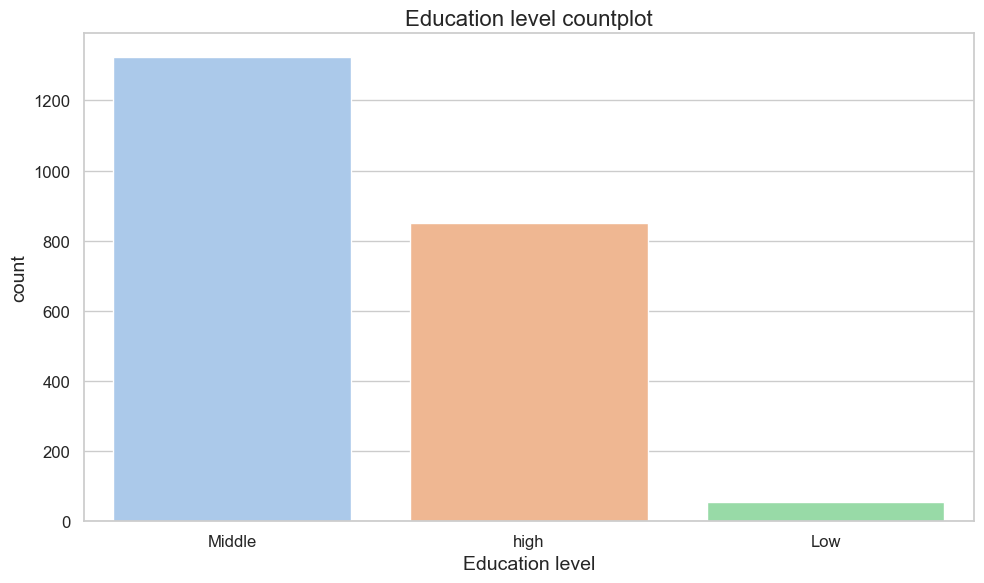

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Education_level', hue='Education_level' )
plt.title("Education level countplot")
#plt.ylabel("")
plt.xlabel("Education level")
plt.tight_layout()

The education level distribution indicates that the majority of customers are from the mid-education segment, followed by the highly educated, while the low-education group is the smallest.   
This demographic structure suggests that marketing efforts may be more effective when tailored to the preferences and communication styles of mid to high-educated customers.

In [35]:
Living_Status_effect = df.groupby("Living_Status")[["Total_Spent", "Total_Campaigns_Accepted"]].mean().reset_index()
Living_Status_effect


,Living_Status,Total_Spent,Total_Campaigns_Accepted
0,Living Alone,622.417402,0.298865
1,Living with Others,596.221448,0.298747


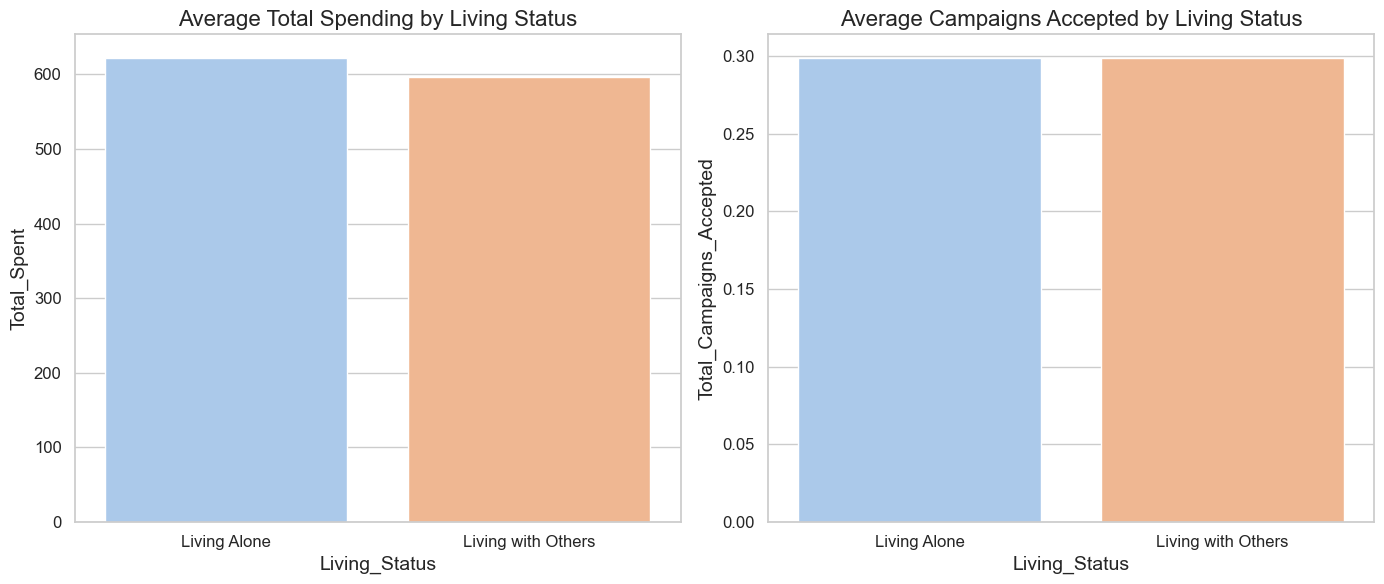

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Total Spent
sns.barplot(data=Living_Status_effect, x="Living_Status", y="Total_Spent", ax=ax[0], hue="Living_Status")
ax[0].set_title("Average Total Spending by Living Status")

# Plot for Total Campaigns Accepted
sns.barplot(data=Living_Status_effect, x="Living_Status", y="Total_Campaigns_Accepted", ax=ax[1], hue="Living_Status")
ax[1].set_title("Average Campaigns Accepted by Living Status")

plt.tight_layout()
plt.show()



**Living-status-Based Insights**   
The analysis shows that individuals living alone tend to spend slightly more on average compared to those living with others. However, there is no significant difference in the number of marketing campaigns accepted between the two groups.   
This suggests that while spending behavior may vary slightly by living situation, campaign responsiveness remains consistent regardless of household status.

In [37]:
Age_Category_effect = df.groupby("Age_Category")[["Total_Spent", "Total_Campaigns_Accepted"]].mean()
Age_Category_effect

C:\Users\user\AppData\Local\Temp\ipykernel_13896\2740567590.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Age_Category_effect = df.groupby("Age_Category")[["Total_Spent", "Total_Campaigns_Accepted"]].mean()


,Total_Spent,Total_Campaigns_Accepted
Age_Category,,
25-34,927.186047,0.534884
35-44,531.026393,0.372434
45-54,503.294540,0.238506
55-64,634.756554,0.279026
65+,714.713821,0.326829


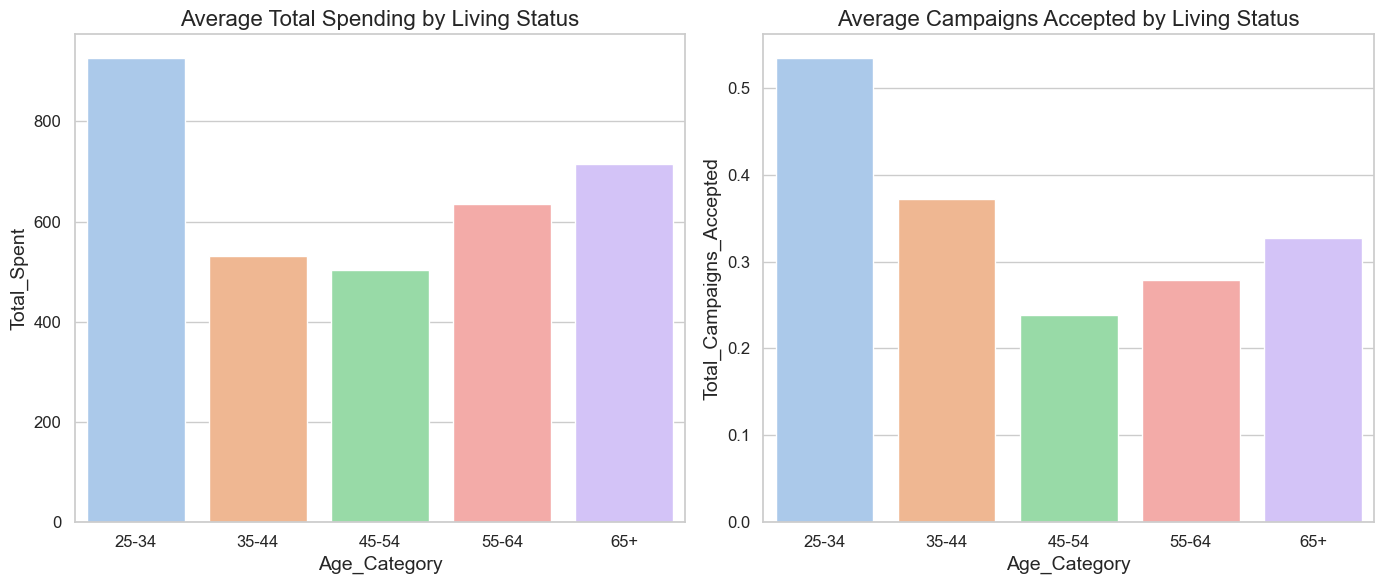

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Total Spent
sns.barplot(data=Age_Category_effect, x="Age_Category", y="Total_Spent", ax=ax[0], hue="Age_Category")
ax[0].set_title("Average Total Spending by Living Status")

# Plot for Total Campaigns Accepted
sns.barplot(data=Age_Category_effect, x="Age_Category", y="Total_Campaigns_Accepted", ax=ax[1], hue="Age_Category")
ax[1].set_title("Average Campaigns Accepted by Living Status")

plt.tight_layout()
plt.show()

**Age-Based Insights**   
The analysis reveals that customers aged 25–34 exhibit the highest average spending, followed by the 65+ and 55–64 age groups. Those aged 35–44 spend moderately, while the 45–54 group records the lowest average total spend.

Similarly, the 25–34 group also has the highest average number of accepted campaigns, followed by customers aged 35–44 and 65+. The 55–64 group shows moderate campaign engagement, while again, the 45–54 group has the lowest acceptance rate.

This consistent pattern suggests that younger adults (25–34) and older customers (65+) are more responsive and engaged with marketing efforts, both in terms of spending and campaign interaction. In contrast, the mid-aged 45–54 segment appears less responsive and may require tailored strategies to boost engagement.

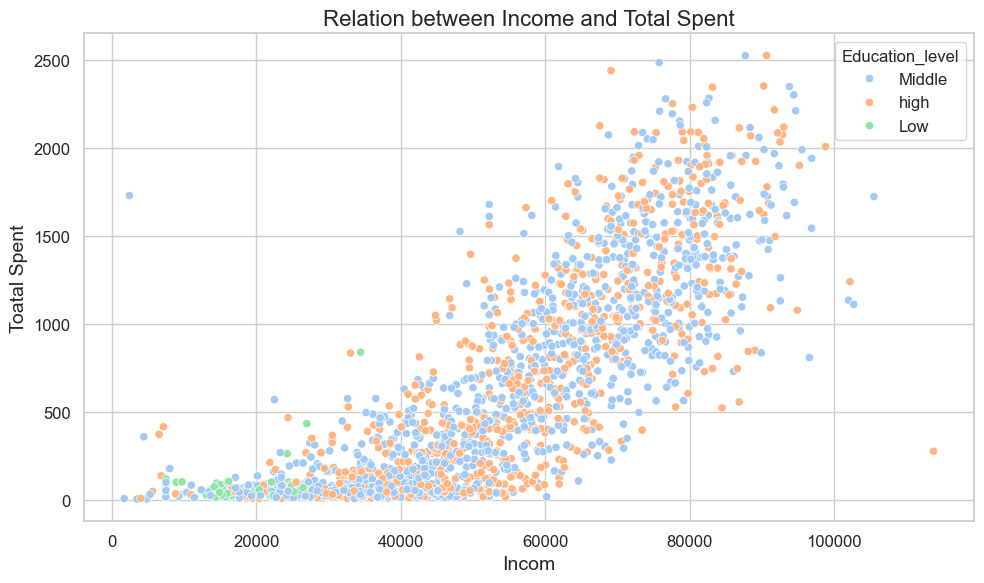

In [39]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x="Income",y="Total_Spent",hue= 'Education_level')
plt.title("Relation between Income and Total Spent")
plt.xlabel("Incom")
plt.ylabel("Toatal Spent")
plt.tight_layout()

In [40]:
correlation = df["Income"].corr(df["Total_Spent"])
print(f"Correlation between Income and Total Spent: {correlation:.2f}")

Correlation between Income and Total Spent: 0.82


The scatter plot between Income and Total Spent reveals a strong positive relationship, supported by a correlation coefficient of 0.82.   
This indicates that higher-income customers are significantly more likely to spend more.   
The strong linear trend suggests income is a key driver of customer spending behavior and could be an effective feature for segmentation or targeting in future campaigns.

In [41]:
# Calculate average spending by parent status
Is_Parent_effect = df.groupby("Is_Parent")["Total_Spent"].mean().reset_index()
Is_Parent_effect["Is_Parent"] = Is_Parent_effect["Is_Parent"].replace({0: "Not Parent", 1: "Parent"})
Is_Parent_effect

,Is_Parent,Total_Spent
0,Not Parent,1106.371248
1,Parent,406.903509


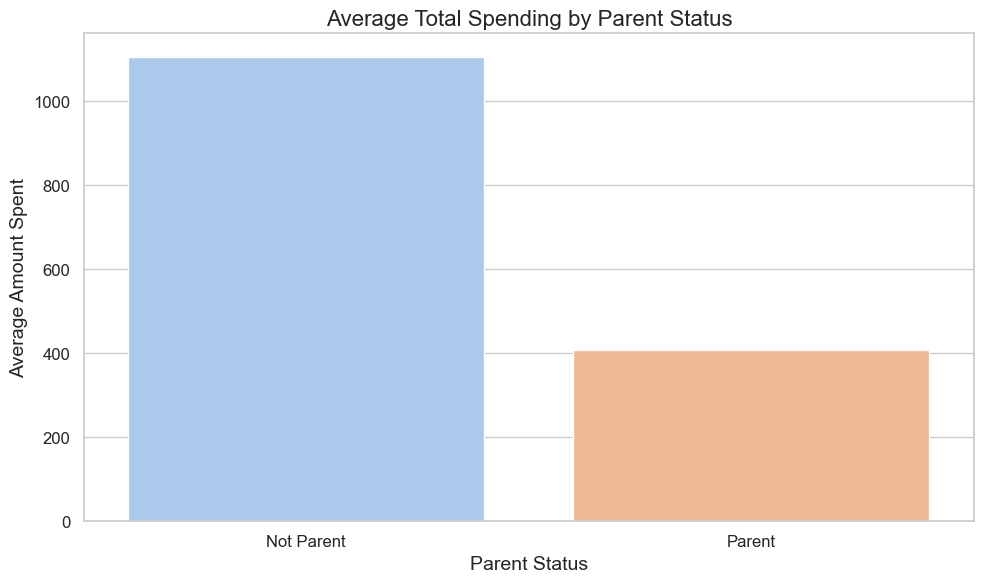

In [42]:
# Create visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=Is_Parent_effect, x="Is_Parent", y="Total_Spent", hue="Is_Parent")
plt.title("Average Total Spending by Parent Status")
plt.ylabel("Average Amount Spent")
plt.xlabel("Parent Status")
plt.tight_layout()
plt.show()

The analysis shows that customers without children spend significantly more on average compared to those with children.   
This suggests that non-parents may have more disposable income or flexibility in spending, making them a potentially more lucrative target group for marketing campaigns.

In [43]:
product_sum = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds']].sum()
product_sum = product_sum.reset_index()
product_sum.columns = ['Product', 'TotalSpent']
product_sum


,Product,TotalSpent
0,MntWines,679826
1,MntFruits,58731
2,MntMeatProducts,368418
3,MntFishProducts,83905
4,MntSweetProducts,60543
5,MntGoldProds,98328


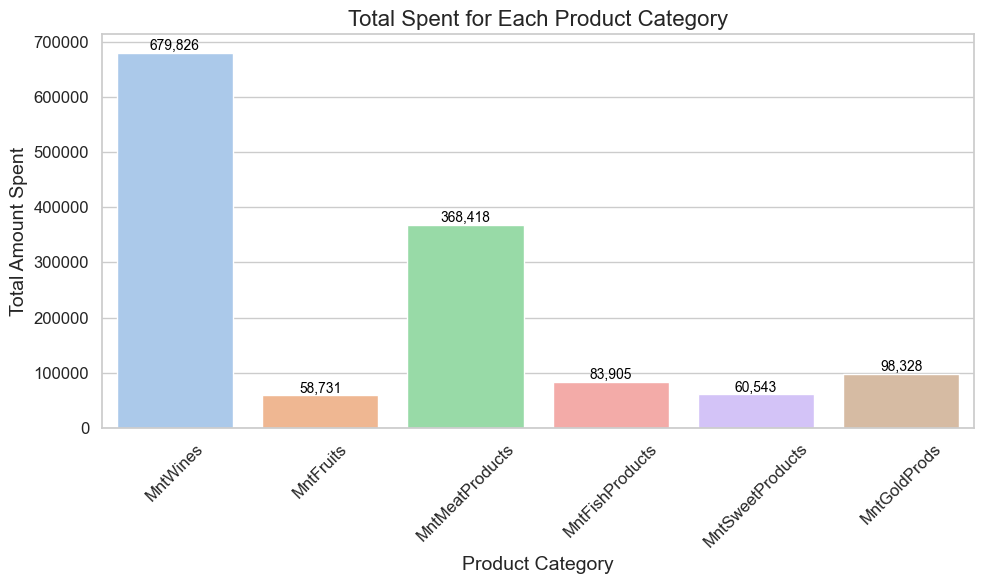

In [55]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=product_sum, x='Product', y='TotalSpent', hue='Product', dodge=False)

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,.0f}',               # format number with commas
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10, color='black')

# Labels and title
plt.title("Total Spent for Each Product Category")
plt.ylabel("Total Amount Spent")
plt.xlabel("Product Category")
plt.tight_layout()
plt.show()


The barplot illustrates total spending by product category over the last two years.   
Wine products represent the highest expenditure, with over 679,000 units in spending, followed by meat products at 368,000.   
Gold, fish, and sweet products fall in the mid-range, while fruits account for the lowest total spending.   
This suggests a strong customer preference for wine and meat products, which could guide inventory, promotions, or cross-selling strategies.

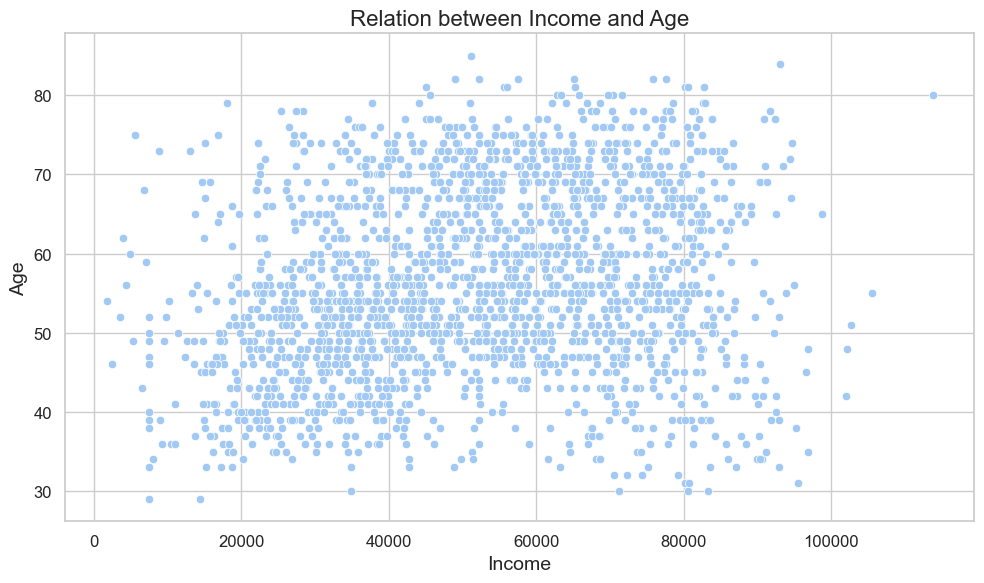

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df,x="Income",y="Age")
plt.title("Relation between Income and Age")
plt.ylabel("Age")
plt.xlabel("Income")
plt.tight_layout()


No clear relationship was observed between income and age.

In [48]:
# Calculate acceptance rates for each campaign
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
campaign_rates = df[campaign_cols].mean().sort_values(ascending=False) * 100
campaign_rates

AcceptedCmp4    7.492149
AcceptedCmp3    7.312696
AcceptedCmp5    7.267833
AcceptedCmp1    6.460296
AcceptedCmp2    1.345895
dtype: float64

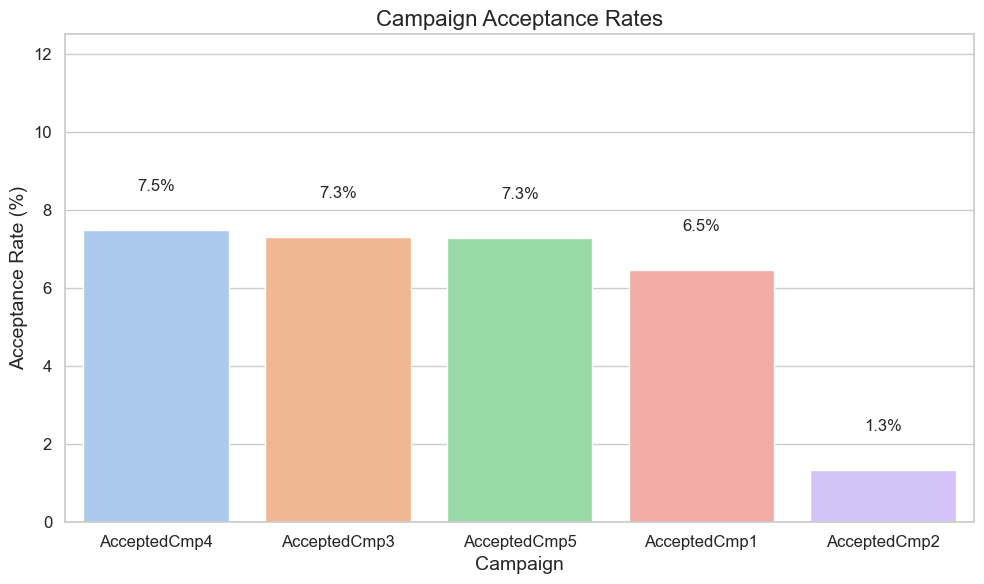

In [ ]:
# Create visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=campaign_rates.index, y=campaign_rates.values, hue= campaign_rates.index)
plt.title('Campaign Acceptance Rates')
plt.xlabel('Campaign')
plt.ylabel('Acceptance Rate (%)')
plt.ylim(0, campaign_rates.max() + 5)  # Add buffer space

# Annotate each bar with percentage
for i, rate in enumerate(campaign_rates):
    plt.text(i, rate + 1, f'{rate:.1f}%', ha='center')

plt.tight_layout()

plt.show()

Campaign 4 had the highest average spending among responders (7.49), followed closely by Campaigns 3 and 5.   
Campaign 1 showed moderate performance, while Campaign 2 had the lowest impact (1.35). This suggests that Campaigns 3–5 were more effective at engaging high-spending customers

Text(0, 0.5, 'Acceptance Rate (%)')

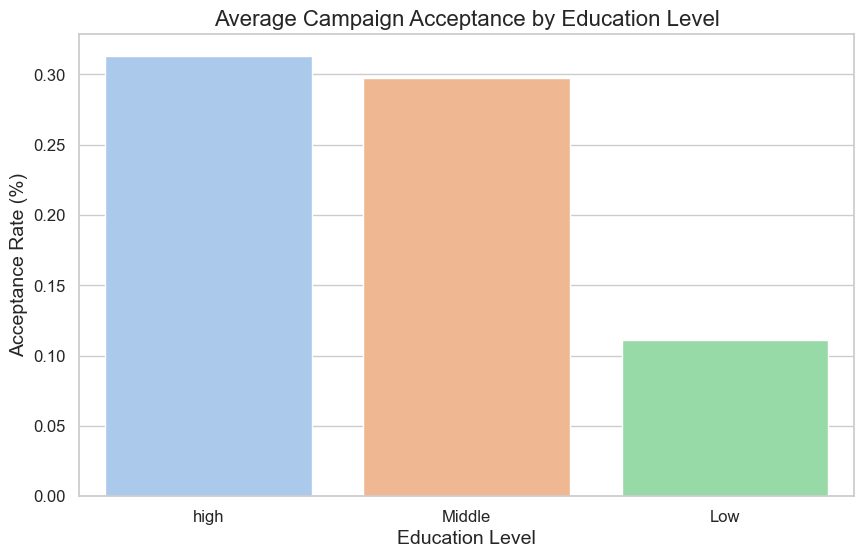

In [51]:
TCA_to_edu_level = df.groupby("Education_level")["Total_Campaigns_Accepted"].mean().sort_values(ascending=False)
TCA_to_edu_level = TCA_to_edu_level.reset_index()
TCA_to_edu_level.columns = ['Education_level', 'Total_Campaigns_Accepted']

plt.figure(figsize=(10,6))
sns.barplot(data=TCA_to_edu_level, x='Education_level' ,y='Total_Campaigns_Accepted' , hue='Education_level')
plt.title('Average Campaign Acceptance by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Acceptance Rate (%)')

The campaign acceptance rate is highest among customers with a high education level, followed closely by those with a medium education level. Customers with a low education level have the lowest acceptance rate, which is less than half that of the medium group. This suggests that educational background may significantly influence responsiveness to marketing campaigns.

C:\Users\user\AppData\Local\Temp\ipykernel_13896\745528138.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  campaign_response = df.groupby('Spending_Group')['Total_Campaigns_Accepted'].mean().reset_index()


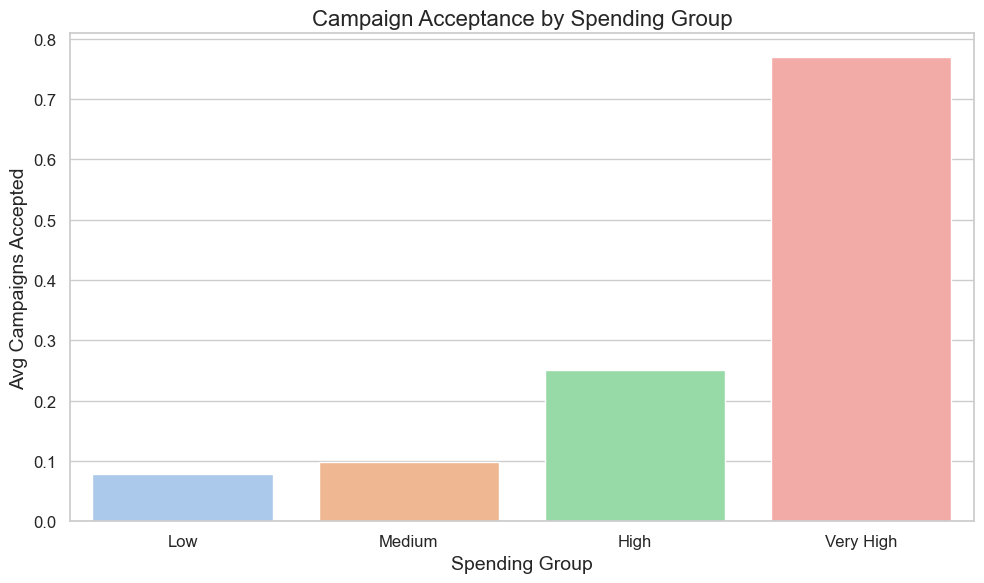

In [54]:
# Calculate mean campaigns accepted by spending group
campaign_response = df.groupby('Spending_Group')['Total_Campaigns_Accepted'].mean().reset_index()

plt.figure(figsize=(10, 6))
spend_plot = sns.barplot(
    x='Spending_Group',
    y='Total_Campaigns_Accepted',
    data=campaign_response,
    order=['Low', 'Medium', 'High', 'Very High'],
    hue="Spending_Group"
)
plt.title('Campaign Acceptance by Spending Group')
plt.xlabel('Spending Group')
plt.ylabel('Avg Campaigns Accepted')
plt.tight_layout()


The barplot shows that customers in the very high spending group have the highest campaign acceptance rate by a significant margin. The high spending group follows, while the medium group accepts about half as many campaigns as the high group. The low spending group has the lowest acceptance rate, slightly below that of the medium group. This indicates a strong positive relationship between spending level and campaign engagement.